# Pandas Time Series Analysis Part 6: Timezone Handling

## Inspired by Dhruv Patel's Code Basics YouTube Channel

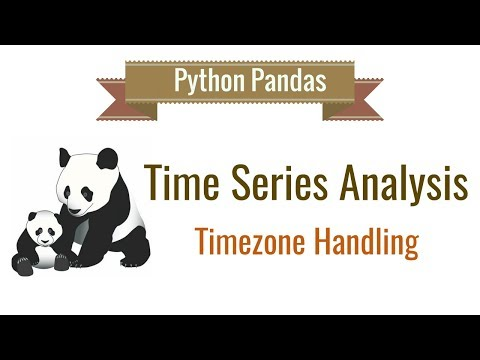

In [1]:
from IPython.display import YouTubeVideo

# Youtube
YouTubeVideo('9IW2GIJajLs')

In [2]:
import pandas as pd 

In [3]:
msft_df = pd.read_csv('MSFT_Stock_Prices',header=1,index_col='Date Time',parse_dates=True)

In [4]:
msft_df

,Price
Date Time,
2017-08-17 09:00:00,72.38
2017-08-17 09:15:00,71.00
2017-08-17 09:30:00,71.67
2017-08-17 10:00:00,72.80
2017-08-17 10:30:00,73.00
2017-08-17 11:00:00,72.50


In [5]:
msft_df.index 

DatetimeIndex(['2017-08-17 09:00:00', '2017-08-17 09:15:00',
               '2017-08-17 09:30:00', '2017-08-17 10:00:00',
               '2017-08-17 10:30:00', '2017-08-17 11:00:00'],
              dtype='datetime64[ns]', name='Date Time', freq=None)

## Converting the naive datetime into a timezone aware datetime 

In [12]:
msft_df = msft_df.tz_convert(tz='US/Eastern')
msft_df.index 

DatetimeIndex(['2017-08-17 09:00:00-04:00', '2017-08-17 09:15:00-04:00',
               '2017-08-17 09:30:00-04:00', '2017-08-17 10:00:00-04:00',
               '2017-08-17 10:30:00-04:00', '2017-08-17 11:00:00-04:00'],
              dtype='datetime64[ns, US/Eastern]', name='Date Time', freq=None)

## Converting the time into Berlin timezone 

In [13]:
msft_df = msft_df.tz_convert(tz = 'Europe/Berlin')
msft_df

,Price
Date Time,
2017-08-17 15:00:00+02:00,72.38
2017-08-17 15:15:00+02:00,71.00
2017-08-17 15:30:00+02:00,71.67
2017-08-17 16:00:00+02:00,72.80
2017-08-17 16:30:00+02:00,73.00
2017-08-17 17:00:00+02:00,72.50


In [14]:
## The timezones are coming from pytz module
from pytz import all_timezones
all_timezones 

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara',
 'Africa/Asmera',
 'Africa/Bamako',
 'Africa/Bangui',
 'Africa/Banjul',
 'Africa/Bissau',
 'Africa/Blantyre',
 'Africa/Brazzaville',
 'Africa/Bujumbura',
 'Africa/Cairo',
 'Africa/Casablanca',
 'Africa/Ceuta',
 'Africa/Conakry',
 'Africa/Dakar',
 'Africa/Dar_es_Salaam',
 'Africa/Djibouti',
 'Africa/Douala',
 'Africa/El_Aaiun',
 'Africa/Freetown',
 'Africa/Gaborone',
 'Africa/Harare',
 'Africa/Johannesburg',
 'Africa/Juba',
 'Africa/Kampala',
 'Africa/Khartoum',
 'Africa/Kigali',
 'Africa/Kinshasa',
 'Africa/Lagos',
 'Africa/Libreville',
 'Africa/Lome',
 'Africa/Luanda',
 'Africa/Lubumbashi',
 'Africa/Lusaka',
 'Africa/Malabo',
 'Africa/Maputo',
 'Africa/Maseru',
 'Africa/Mbabane',
 'Africa/Mogadishu',
 'Africa/Monrovia',
 'Africa/Nairobi',
 'Africa/Ndjamena',
 'Africa/Niamey',
 'Africa/Nouakchott',
 'Africa/Ouagadougou',
 'Africa/Porto-Novo',
 'Africa/Sao_Tome',
 'Africa/Timbuktu',
 'Africa/

In [15]:
# Converting into Mumbai timezone
msft_df = msft_df.tz_convert(tz = 'Asia/Kolkata')
msft_df

,Price
Date Time,
2017-08-17 18:30:00+05:30,72.38
2017-08-17 18:45:00+05:30,71.00
2017-08-17 19:00:00+05:30,71.67
2017-08-17 19:30:00+05:30,72.80
2017-08-17 20:00:00+05:30,73.00
2017-08-17 20:30:00+05:30,72.50


### Also we can convert the index instead of the entire data frame

In [16]:
msft_df = msft_df.index.tz_convert(tz = 'Asia/Kolkata')
msft_df

DatetimeIndex(['2017-08-17 18:30:00+05:30', '2017-08-17 18:45:00+05:30',
               '2017-08-17 19:00:00+05:30', '2017-08-17 19:30:00+05:30',
               '2017-08-17 20:00:00+05:30', '2017-08-17 20:30:00+05:30'],
              dtype='datetime64[ns, Asia/Kolkata]', name='Date Time', freq=None)

# Timezone in date range function

In [17]:
dt_rng = pd.date_range(start='1/1/2019',periods=10, freq='H')
dt_rng # Datetime is created as naive datetime format

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 01:00:00',
               '2019-01-01 02:00:00', '2019-01-01 03:00:00',
               '2019-01-01 04:00:00', '2019-01-01 05:00:00',
               '2019-01-01 06:00:00', '2019-01-01 07:00:00',
               '2019-01-01 08:00:00', '2019-01-01 09:00:00'],
              dtype='datetime64[ns]', freq='H')

In [18]:
# To create timezone aware datetime range
dt_rng_tz = pd.date_range(start='1/1/2019',periods=10, freq='H', tz = 'Europe/London')
dt_rng_tz 

DatetimeIndex(['2019-01-01 00:00:00+00:00', '2019-01-01 01:00:00+00:00',
               '2019-01-01 02:00:00+00:00', '2019-01-01 03:00:00+00:00',
               '2019-01-01 04:00:00+00:00', '2019-01-01 05:00:00+00:00',
               '2019-01-01 06:00:00+00:00', '2019-01-01 07:00:00+00:00',
               '2019-01-01 08:00:00+00:00', '2019-01-01 09:00:00+00:00'],
              dtype='datetime64[ns, Europe/London]', freq='H')

In [19]:
# Another type of timezone that can be used is dateutil
# To create timezone aware datetime range
dt_rng_tz = pd.date_range(start='1/1/2019',periods=10, freq='H', tz = 'dateutil/Europe/London')
dt_rng_tz 

DatetimeIndex(['2019-01-01 00:00:00+00:00', '2019-01-01 01:00:00+00:00',
               '2019-01-01 02:00:00+00:00', '2019-01-01 03:00:00+00:00',
               '2019-01-01 04:00:00+00:00', '2019-01-01 05:00:00+00:00',
               '2019-01-01 06:00:00+00:00', '2019-01-01 07:00:00+00:00',
               '2019-01-01 08:00:00+00:00', '2019-01-01 09:00:00+00:00'],
              dtype='datetime64[ns, tzfile('GB-Eire')]', freq='H')

### Arithmetic between two different timezones 

In [20]:
rng = pd.date_range(start="2017-08-22 09:00:00",periods=10, freq='30min')
s = pd.Series(range(10),index=rng)
s

2017-08-22 09:00:00    0
2017-08-22 09:30:00    1
2017-08-22 10:00:00    2
2017-08-22 10:30:00    3
2017-08-22 11:00:00    4
2017-08-22 11:30:00    5
2017-08-22 12:00:00    6
2017-08-22 12:30:00    7
2017-08-22 13:00:00    8
2017-08-22 13:30:00    9
Freq: 30T, dtype: int64

In [21]:
b_tz = s.tz_localize(tz="Europe/Berlin")
b_tz

2017-08-22 09:00:00+02:00    0
2017-08-22 09:30:00+02:00    1
2017-08-22 10:00:00+02:00    2
2017-08-22 10:30:00+02:00    3
2017-08-22 11:00:00+02:00    4
2017-08-22 11:30:00+02:00    5
2017-08-22 12:00:00+02:00    6
2017-08-22 12:30:00+02:00    7
2017-08-22 13:00:00+02:00    8
2017-08-22 13:30:00+02:00    9
Freq: 30T, dtype: int64

In [22]:
b_tz.index 

DatetimeIndex(['2017-08-22 09:00:00+02:00', '2017-08-22 09:30:00+02:00',
               '2017-08-22 10:00:00+02:00', '2017-08-22 10:30:00+02:00',
               '2017-08-22 11:00:00+02:00', '2017-08-22 11:30:00+02:00',
               '2017-08-22 12:00:00+02:00', '2017-08-22 12:30:00+02:00',
               '2017-08-22 13:00:00+02:00', '2017-08-22 13:30:00+02:00'],
              dtype='datetime64[ns, Europe/Berlin]', freq='30T')

In [23]:
m_tz = s.tz_localize(tz="Asia/Kolkata")
m_tz

2017-08-22 09:00:00+05:30    0
2017-08-22 09:30:00+05:30    1
2017-08-22 10:00:00+05:30    2
2017-08-22 10:30:00+05:30    3
2017-08-22 11:00:00+05:30    4
2017-08-22 11:30:00+05:30    5
2017-08-22 12:00:00+05:30    6
2017-08-22 12:30:00+05:30    7
2017-08-22 13:00:00+05:30    8
2017-08-22 13:30:00+05:30    9
Freq: 30T, dtype: int64

In [24]:
b_tz + m_tz # while doing date arithmetic the dates are converted to UTC timezone

2017-08-22 03:30:00+00:00     NaN
2017-08-22 04:00:00+00:00     NaN
2017-08-22 04:30:00+00:00     NaN
2017-08-22 05:00:00+00:00     NaN
2017-08-22 05:30:00+00:00     NaN
2017-08-22 06:00:00+00:00     NaN
2017-08-22 06:30:00+00:00     NaN
2017-08-22 07:00:00+00:00     7.0
2017-08-22 07:30:00+00:00     9.0
2017-08-22 08:00:00+00:00    11.0
2017-08-22 08:30:00+00:00     NaN
2017-08-22 09:00:00+00:00     NaN
2017-08-22 09:30:00+00:00     NaN
2017-08-22 10:00:00+00:00     NaN
2017-08-22 10:30:00+00:00     NaN
2017-08-22 11:00:00+00:00     NaN
2017-08-22 11:30:00+00:00     NaN
Freq: 30T, dtype: float64